## Calculating the Return of a Portfolio of Securities

Download data for a portfolio composed of 5 stocks. Do it for British Petroleum, Ford, Exxon, Lincoln, and Apple for the period ‘2000-1-1’ until today.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [11]:
tickers = ['BP', 'F', 'XOM', 'LNC', 'AAPL']
data_dir = '../dataset'
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = pd.read_csv(os.path.join(data_dir,t+'.csv'), index_col=0)['Adj Close']
mydata.index = pd.to_datetime(mydata.index)
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4344 entries, 2000-01-03 to 2017-04-07
Data columns (total 5 columns):
BP      4344 non-null float64
F       4344 non-null float64
XOM     4344 non-null float64
LNC     4344 non-null float64
AAPL    4344 non-null float64
dtypes: float64(5)
memory usage: 203.6 KB


In [12]:
mydata.head()

,BP,F,XOM,LNC,AAPL
Date,,,,,
2000-01-03,58.8125,28.782394,39.15625,39.0625,3.997768
2000-01-04,58.5000,27.820692,38.40625,37.9375,3.660714
2000-01-05,60.5000,27.923731,40.50000,36.6250,3.714286
2000-01-06,60.6250,27.958078,42.59375,37.0000,3.392857
2000-01-07,59.5000,30.018869,42.46875,37.9375,3.553571


In [13]:
mydata.tail()

,BP,F,XOM,LNC,AAPL
Date,,,,,
2017-04-03,34.400002,11.44,82.070000,65.230003,143.699997
2017-04-04,34.790001,11.37,82.370003,65.169998,144.770004
2017-04-05,34.590000,11.26,82.529999,64.540001,144.020004
2017-04-06,34.730000,11.27,83.010002,65.699997,143.660004
2017-04-07,34.849998,11.23,82.760002,65.610001,143.339996


### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

Normalize to a hundred and plot the data on a graph (you can apply the .loc() or the .iloc() method). 

In [14]:
mydata.iloc[0]

BP      58.812500
F       28.782394
XOM     39.156250
LNC     39.062500
AAPL     3.997768
Name: 2000-01-03 00:00:00, dtype: float64

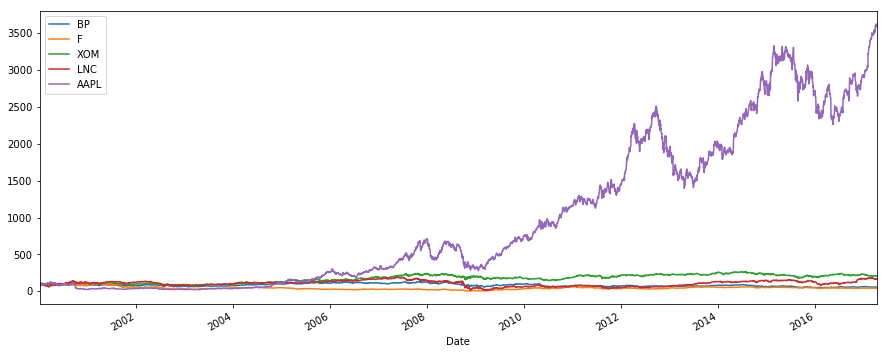

In [17]:
(mydata / mydata.iloc[0] * 100).plot(figsize=(15,6))
plt.show()

How would you interpret the behavior of the stocks? Just by looking at the chart, would you be able to create a portfolio that provides a solid return on investment?

*****

### Calculating the Return of a Portfolio of Securities

Obtain the simple return of the securities in the portfolio and store the results in a new table.

In [18]:
simple_returns = (mydata / mydata.shift(1)) - 1
simple_returns.head()

,BP,F,XOM,LNC,AAPL
Date,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN
2000-01-04,-0.005313,-0.033413,-0.019154,-0.028800,-0.084311
2000-01-05,0.034188,0.003704,0.054516,-0.034596,0.014634
2000-01-06,0.002066,0.001230,0.051698,0.010239,-0.086539
2000-01-07,-0.018557,0.073710,-0.002935,0.025338,0.047368


First, assume you would like to create an equally-weighted portfolio. Create the array, naming it “weights”.

In [20]:
weights = np.array([1.0/5.0 for _ in range(5)])
print weights

[ 0.2  0.2  0.2  0.2  0.2]


Obtain the annual returns of each of the stocks and then calculate the dot product of these returns and the weights.

In [21]:
num_of_trade_days = 250
avg_return_a = simple_returns.mean() * num_of_trade_days
print avg_return_a

BP      0.011241
F       0.038840
XOM     0.073409
LNC     0.175263
AAPL    0.298899
dtype: float64


In [23]:
portfolio_return = np.dot(weights, avg_return_a)
print portfolio_return

0.11953053967


Transform the result into a percentage form. 

In [24]:
print str(round(portfolio_return, 5)*100)+'%'

11.953%


Is the return of this portfolio satisfactory?